<a href="https://colab.research.google.com/github/pipreaper/colabatory/blob/master/read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# install dependancies
from google.colab import files
import numpy as np
import pandas as pd
from os import listdir
from os import chdir
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
!ls '/content/gdrive/My Drive/COT_DATA/'

annual_0.txt   annual_14.txt  annual_19.txt  annual_4.txt  annual_9.txt
annual_10.txt  annual_15.txt  annual_1.txt   annual_5.txt  data_all.csv
annual_11.txt  annual_16.txt  annual_20.txt  annual_6.txt  data.csv
annual_12.txt  annual_17.txt  annual_2.txt   annual_7.txt  unique_data_all.csv
annual_13.txt  annual_18.txt  annual_3.txt   annual_8.txt  Unique_data_all.csv


In [46]:
# store the data into a data frame
# df = pd.read_csv('/content/gdrive/My Drive/COT_DATA/annual_20.txt')
# change working directory-
chdir('/content/gdrive/My Drive/COT_DATA')
#cwd = os.getcwd()  # Get the current working directory (cwd)
#files = os.listdir(cwd)  # Get all the files in that directory
#print("Files in %r: %s" % (cwd, files))

# Read all the files into one data frame
filepaths = [f for f in listdir('/content/gdrive/My Drive/COT_DATA/') if f.endswith('.txt')]
df = pd.concat(map(pd.read_csv, filepaths))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,37,38,39,40,41,42,43,44,45,46,126) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df.shape

(155771, 130)

In [48]:
df['flip'] = df['% of OI-Noncommercial-Long (All)'] - df['% of OI-Noncommercial-Short (All)']
# sort data by 
df = df.sort_values(['Market and Exchange Names','As of Date in Form YYMMDD'])
df.head(5)
# Strip all the space
df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace(" ","")
df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace(","," - ")
df['Market and Exchange Names'] = df['Market and Exchange Names'].str.replace("DOLLARS","DOLLAR")
chart_data = df[['Market and Exchange Names','As of Date in Form YYMMDD','As of Date in Form YYYY-MM-DD','Noncommercial Positions-Long (All)','Noncommercial Positions-Short (All)','Change in Noncommercial-Long (All)','Change in Noncommercial-Short (All)','% of OI-Noncommercial-Long (All)','% of OI-Noncommercial-Short (All)','flip']]
chart_data = chart_data.sort_values(['Market and Exchange Names','As of Date in Form YYMMDD'])
chart_data.head(5)

,Market and Exchange Names,As of Date in Form YYMMDD,As of Date in Form YYYY-MM-DD,Noncommercial Positions-Long (All),Noncommercial Positions-Short (All),Change in Noncommercial-Long (All),Change in Noncommercial-Short (All),% of OI-Noncommercial-Long (All),% of OI-Noncommercial-Short (All),flip
1101,#2HEATINGOIL - NYHARBOR-ULSD-NEWYORKMERCANTILE...,131112,2013-11-12,40222,75422,280,4672,13.0,24.4,-11.4
1100,#2HEATINGOIL - NYHARBOR-ULSD-NEWYORKMERCANTILE...,131119,2013-11-19,41072,74888,850,-534,13.3,24.3,-11.0
1099,#2HEATINGOIL - NYHARBOR-ULSD-NEWYORKMERCANTILE...,131126,2013-11-26,44933,68303,3861,-6585,15.4,23.4,-8.0
1098,#2HEATINGOIL - NYHARBOR-ULSD-NEWYORKMERCANTILE...,131203,2013-12-03,50502,62726,5569,-5577,17.5,21.7,-4.2
1097,#2HEATINGOIL - NYHARBOR-ULSD-NEWYORKMERCANTILE...,131210,2013-12-10,55930,66941,5428,4215,18.3,21.9,-3.6


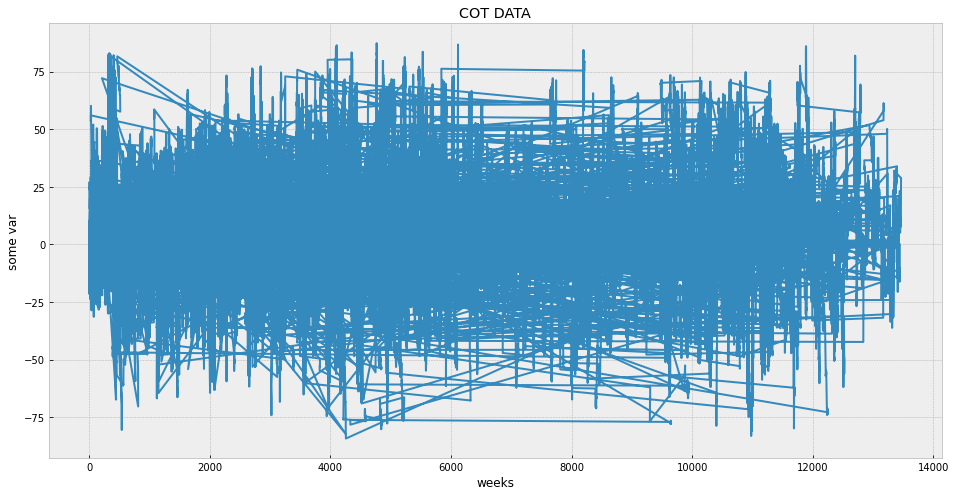

In [49]:
plt.figure(figsize=(16,8))
plt.title('COT DATA')
plt.xlabel('weeks')
plt.ylabel('some var')
plt.plot(df['flip'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 2885 to 5495
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Market and Exchange Names            1016 non-null   object        
 1   As of Date in Form YYMMDD            1016 non-null   int64         
 2   As of Date in Form YYYY-MM-DD        1016 non-null   datetime64[ns]
 3   Noncommercial Positions-Long (All)   1016 non-null   int64         
 4   Noncommercial Positions-Short (All)  1016 non-null   int64         
 5   Change in Noncommercial-Long (All)   1016 non-null   object        
 6   Change in Noncommercial-Short (All)  1016 non-null   object        
 7   % of OI-Noncommercial-Long (All)     1016 non-null   float64       
 8   % of OI-Noncommercial-Short (All)    1016 non-null   float64       
 9   flip                                 1016 non-null   float64       
dtypes: dateti

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


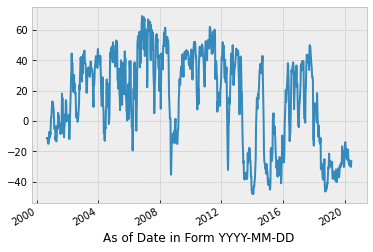

In [53]:
#df['Market and Exchange Names']
#print(df['flip'].max())
# filter rows for year # filter rows for year 2002 using  the boolean expression
chart_data_AUD = chart_data[chart_data['Market and Exchange Names'].eq('AUSTRALIANDOLLAR-CHICAGOMERCANTILEEXCHANGE')]
chart_data_AUD.head(5)
chart_data_AUD['As of Date in Form YYYY-MM-DD'] = pd.to_datetime(chart_data_AUD['As of Date in Form YYYY-MM-DD'])
chart_data_AUD.info()

chart_data_AUD.set_index('As of Date in Form YYYY-MM-DD')['flip'].plot();

#plt.figure(figsize=(16,8))
#plt.title('COT DATA')
#plt.xlabel('weeks')
#plt.ylabel('some var')
#plt.plot(chart_data_AUD['flip'])
#plt.show()




#chart_data.to_csv('data_all.csv')
# Write data frame to google drive
#!cp data.csv '/content/gdrive/My Drive/COT_DATA'
# Write a file to local hard disk
#from google.colab import files
#files.download("data_all.csv")